In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 4 (Fixed Test Set).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,Vietnam airport,Vietnam flights,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,11,59,32,8,58,7,69,52,73,...,18,20,0,32,0,8,98,53,109,Train
2008-01-02,411032,0,51,0,0,46,6,61,35,53,...,10,19,5,39,7,5,91,53,108,Train
2008-01-03,414332,0,57,7,24,58,6,61,51,57,...,38,28,6,30,0,0,90,53,106,Train
2008-01-04,395900,0,51,6,9,58,6,66,43,53,...,25,22,8,45,0,8,83,56,106,Train
2008-01-05,366387,0,57,0,7,57,6,63,46,58,...,16,22,5,47,0,9,80,57,106,Train


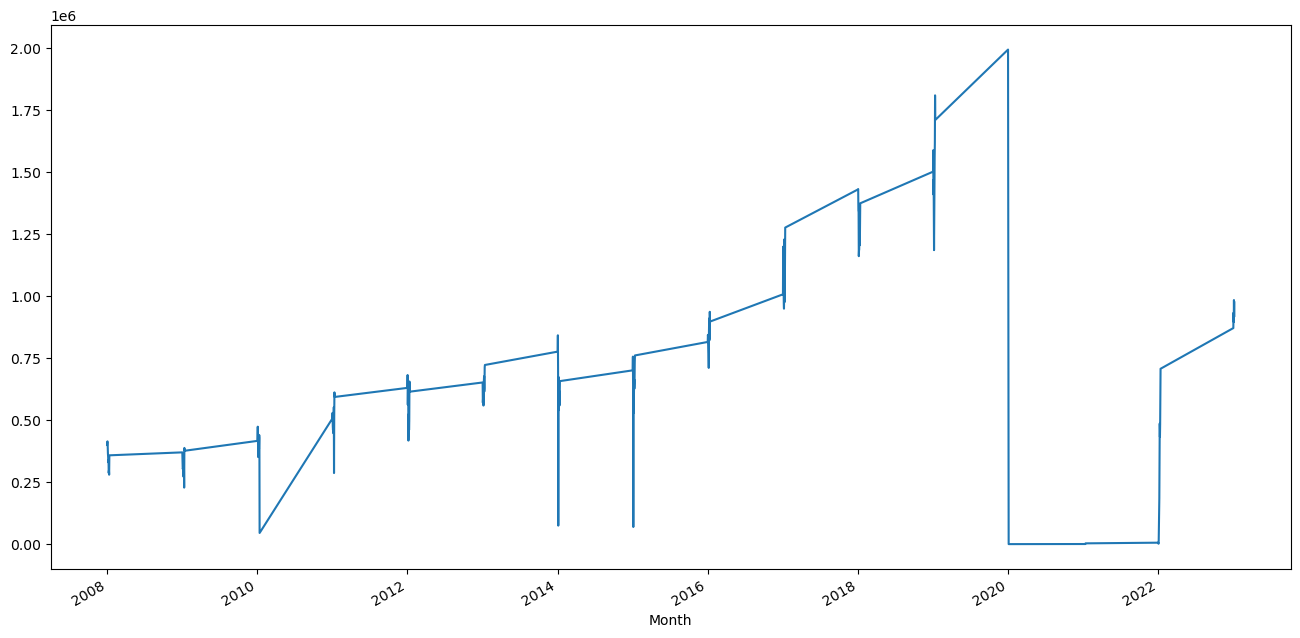

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Airbnb Vietnam  Vietnam restaurant  \
Month                                                             
2008-01-01           399556              11                  59   
2008-01-02           411032               0                  51   
2008-01-03           414332               0                  57   
2008-01-04           395900               0                  51   
2008-01-05           366387               0                  57   
...                     ...             ...                 ...   
2023-01-02           932969              64                  88   
2023-01-03           895425              65                  84   
2023-01-04           984146              58                  90   
2023-01-05           916257              56                  82   
2023-01-06           975010              63                  86   

            Shopping in Hanoi  Shopping in Ho Chi Minh  Vietnam tour  \
Month                                                   

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5062.559, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5058.682, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5059.447, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5059.222, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5056.726, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5057.622, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5057.310, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5058.795, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5060.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5060.497, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5062.493, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.116 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/01/2021'].dropna()
test = df1['Tourist Arrival']['01/04/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/01/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/04/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(0,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50228D+01    |proj g|=  6.06977D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23      0      1      0     0     0   6.070D-07   1.502D+01
  F =   15.022774507927723     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Tourist Arrival   No. Observations:                  157
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2358.576
Date:                Wed, 23 Aug 2023   AIC                           4763.151
Time:                        22:10:04   BIC                           4833.150
Sample:                             0   HQIC                          4791.583
                                - 157                                         
Covariance Type:                  opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Airbnb Vietnam           -231.7580   2.88e+05     -0.001      0.999   -5.64e+05    5.64e+05
Vietnam restaurant       2030.5705   3.98e+05      0.005      0.996   -7.78e+05    7.82e+05
Shopping in Hanoi        1050.9068   4.57e+05      0.002      0.998   -8.96e+05    8.98e+05
Shopping in Ho Chi Minh  1390.5781   4.45e+05      0.003      0.998   -8.71e+05    8.73e+05
Vietnam tour             2640.9897   6.58e+05      0.004      0.997   -1.29e+06    1.29e+06
Skyscanner               5614.3179   4.88e+05      0.011      0.991   -9.51e+05    9.62e+05
Vietnam visa             6248.1429   4.87e+05      0.013      0.990   -9.47e+05     9.6e+05
Vietnam airport          -777.5641   5.78e+05     -0.001      0.999   -1.13e+06    1.13e+06
Vietnam flights         -3936.5826   4.89e+05     -0.008      0.994   -9.63e+05    9.55e+05
Danang airport            497.8449   2.52e+05      0.002      0.998   -4.93e+05    4.94e+05
Hoi An                  -2075.5019   2.72e+05     -0.008      0.994   -5.36e+05    5.32e+05
Vietnam weather           356.2400   3.06e+05      0.001      0.999      -6e+05    6.01e+05
Visa for Vietnam         2699.2375   6.77e+05      0.004      0.997   -1.32e+06    1.33e+06
Sgn airport              1490.7794    3.4e+05      0.004      0.997   -6.65e+05    6.68e+05
Phu Quoc                 3746.4852   2.54e+05      0.015      0.988   -4.93e+05    5.01e+05
Vietnam itinerary       -2182.2414   3.83e+05     -0.006      0.995   -7.54e+05    7.49e+05
Vietnam trip             4680.6460   3.68e+05      0.013      0.990   -7.17e+05    7.26e+05
Things to do in Hue      4291.8686   5.11e+05      0.008      0.993   -9.97e+05    1.01e+06
Vietnam backpackers     -4599.3331   5.02e+05     -0.009      0.993   -9.89e+05    9.79e+05
CCI                     -1285.1466   6.34e+05     -0.002      0.998   -1.24e+06    1.24e+06
PMI                     -4840.6726   9.54e+05     -0.005      0.996   -1.88e+06    1.87e+06
REERI                   -6549.6749   1.55e+06     -0.004      0.997   -3.05e+06    3.03e+06
sigma2                   2.606e+12   4.21e+11      6.185      0.000    1.78e+12    3.43e+12
===================================================================================
Ljung-Box (L1) (Q):                  20.78   Jarque-Bera (JB):               170.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.02
Prob(H) (two-sided):                  0.53   Kurtosis:                         8.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 444507.1133923602


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 377059.42012634437


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 4.475251889134002e+20


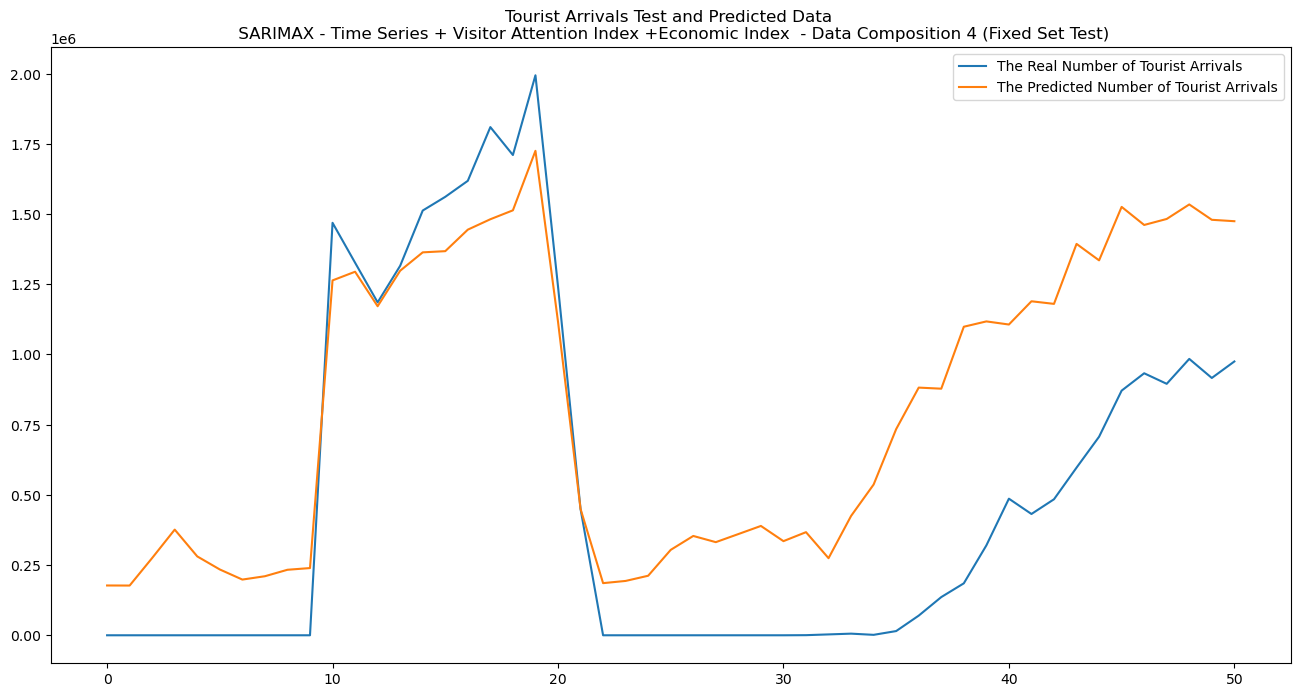

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index +Economic Index  - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()